<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [2]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [3]:
## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [4]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(dataset_part_2_csv)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [5]:
df.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')

First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


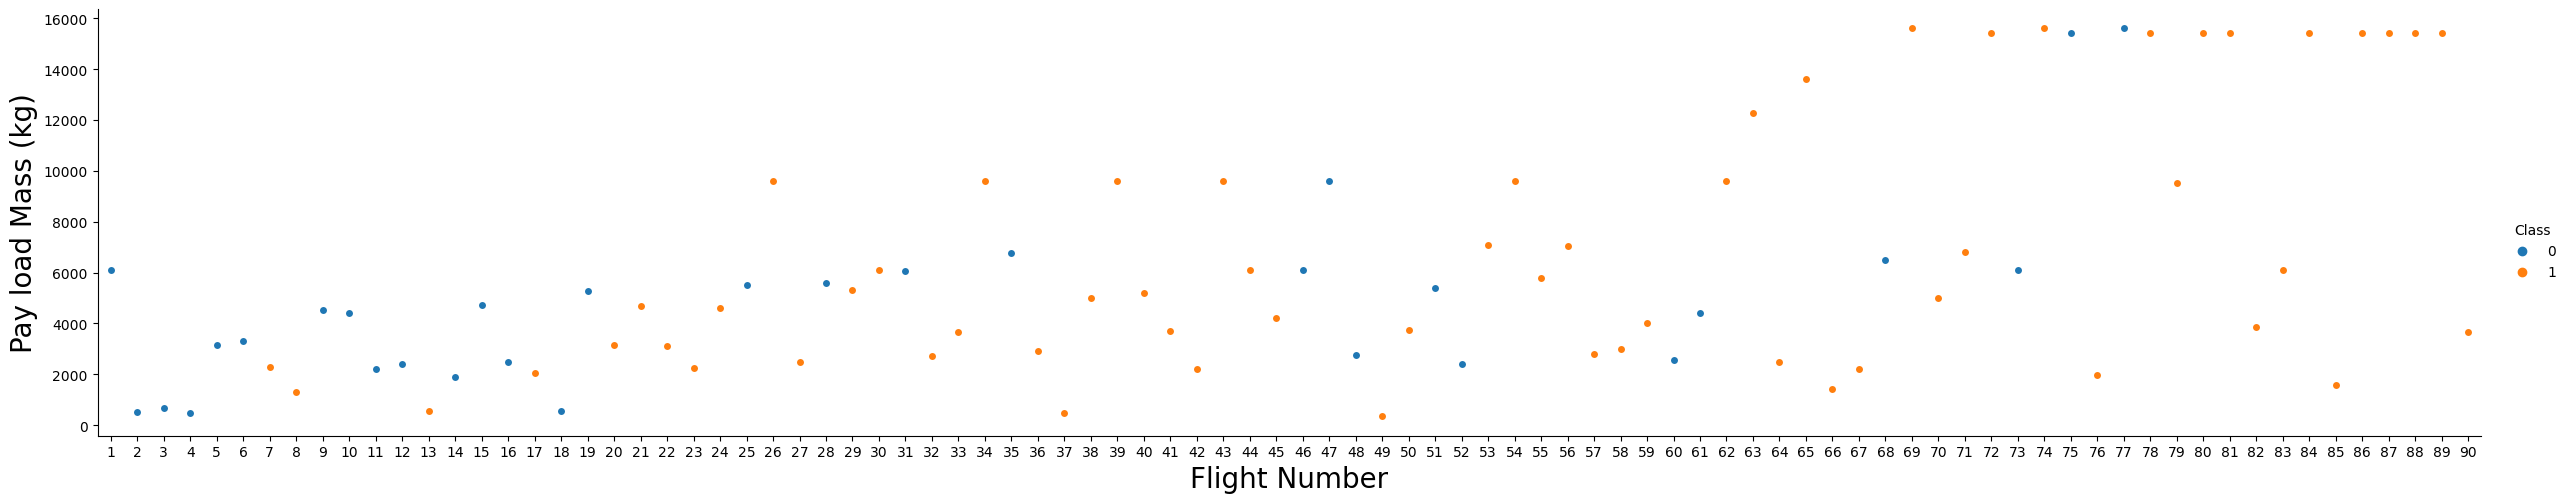

In [6]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

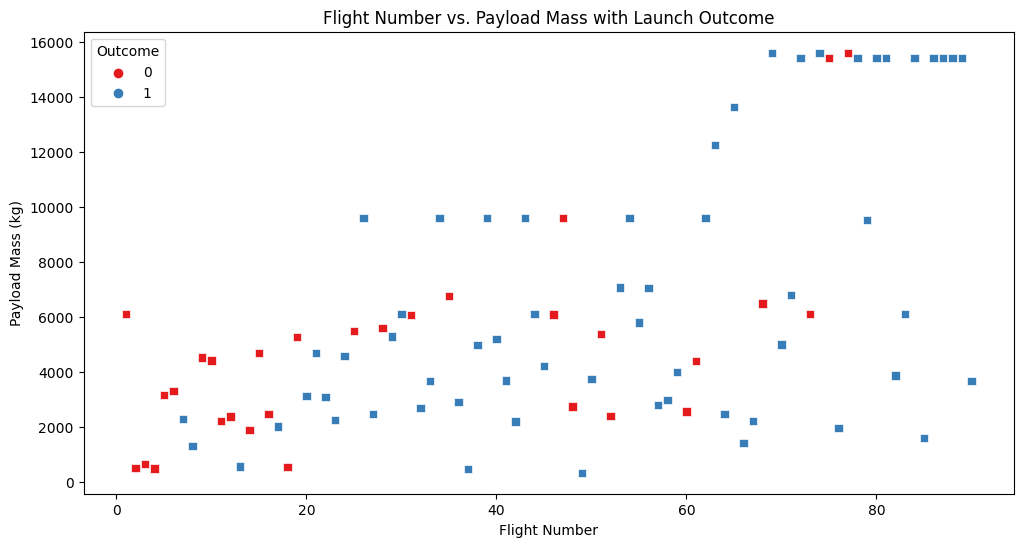

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named 'df' with your data
# Replace 'df' with the actual name of your DataFrame

# Create a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='FlightNumber', y='PayloadMass', hue='Class', marker='s', data=df, palette='Set1')

# Add labels and title
plt.xlabel('Flight Number')
plt.ylabel('Payload Mass (kg)')
plt.title('Flight Number vs. Payload Mass with Launch Outcome')

# Show the legend
plt.legend(title='Outcome')

# Display the plot
plt.show()


We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


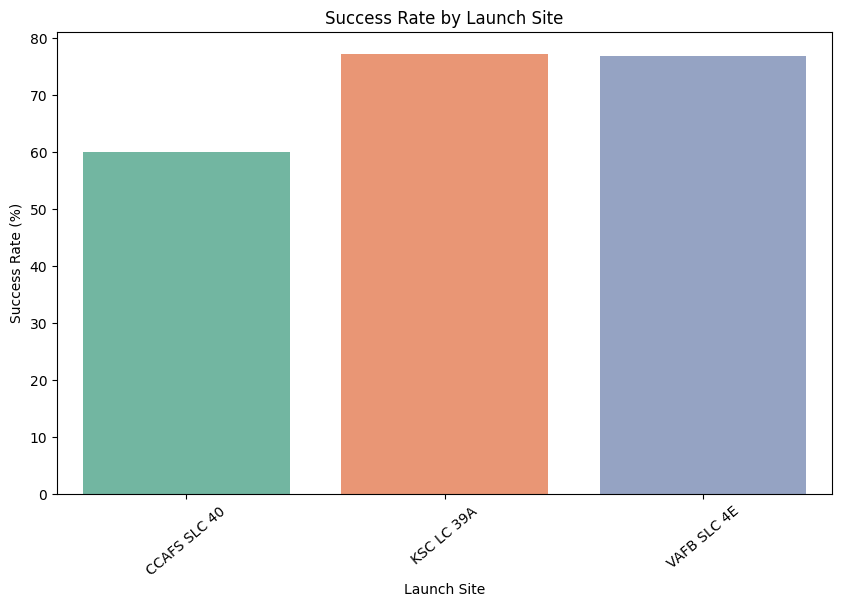

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named 'df' with your data
# Replace 'df' with the actual name of your DataFrame

# Calculate success rates for each launch site
success_rates = df.groupby('LaunchSite')['Class'].mean() * 100

# Create a bar chart to visualize success rates
plt.figure(figsize=(10, 6))
sns.barplot(x=success_rates.index, y=success_rates.values, palette='Set2')
plt.xlabel('Launch Site')
plt.ylabel('Success Rate (%)')
plt.title('Success Rate by Launch Site')
plt.xticks(rotation=40)

# Display the plot
plt.show()


In [37]:
success_rates = df.groupby('LaunchSite')['Class'].mean() * 100
success_rates

LaunchSite
CCAFS SLC 40    60.000000
KSC LC 39A      77.272727
VAFB SLC 4E     76.923077
Name: Class, dtype: float64

Next, let's drill down to each site visualize its detailed launch records.


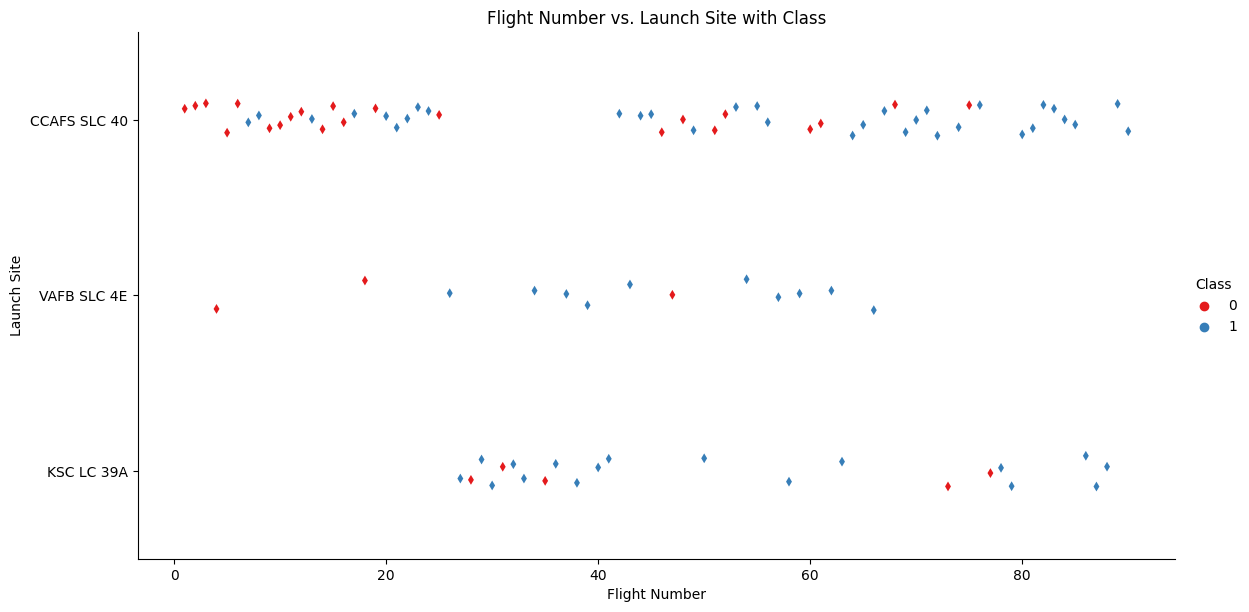

In [51]:
### TASK 1: Visualize the relationship between Flight Number and Launch Site
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with your data
# Replace 'df' with the actual name of your DataFrame

# Create the catplot
sns.catplot(x='FlightNumber', y='LaunchSite', hue='Class', data=df, height=6, aspect=2, marker='d', kind='strip', palette='Set1')

# Set labels and title
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')
plt.title('Flight Number vs. Launch Site with Class')

# Display the plot
plt.show()


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


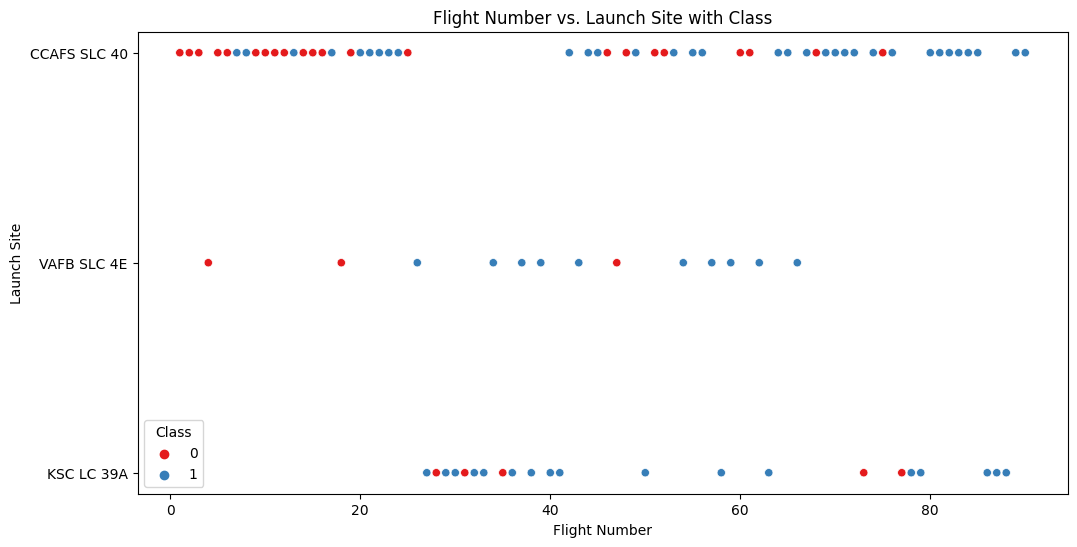

In [41]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with your data
# Replace 'df' with the actual name of your DataFrame

# Create a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='FlightNumber', y='LaunchSite', hue='Class', data=df, palette='Set1')

# Set labels and title
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')
plt.title('Flight Number vs. Launch Site with Class')

# Display the plot
plt.legend(title='Class', loc='lower left')
plt.show()


Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


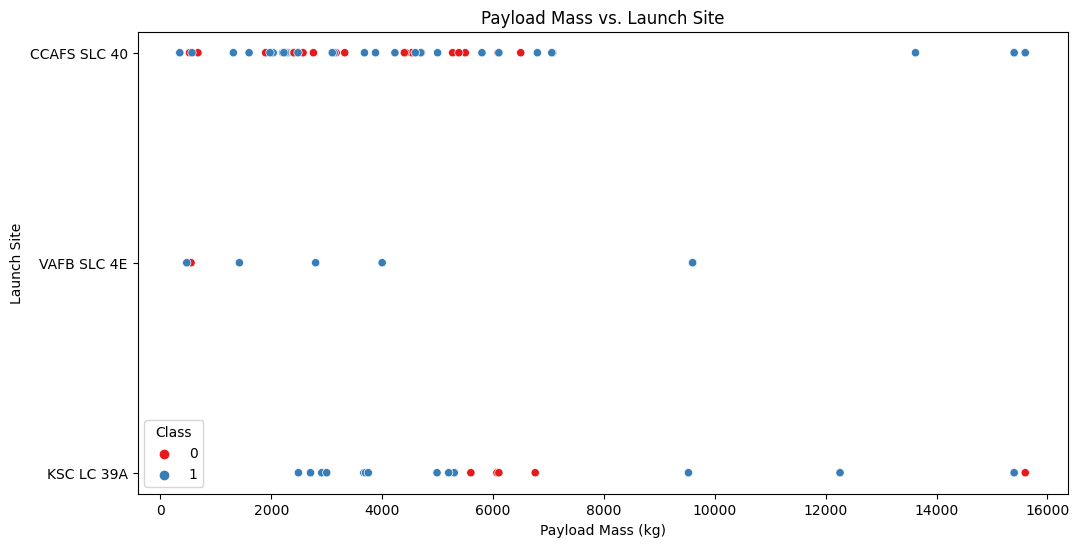

In [15]:
### TASK 2: Visualize the relationship between Payload and Launch Site
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with your data
# Replace 'df' with the actual name of your DataFrame

# Create a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='PayloadMass', y='LaunchSite', hue='Class', data=df, palette='Set1')

# Set labels and title
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Launch Site')
plt.title('Payload Mass vs. Launch Site')

# Display the plot
plt.show()


We also want to observe if there is any relationship between launch sites and their payload mass.


In [ ]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


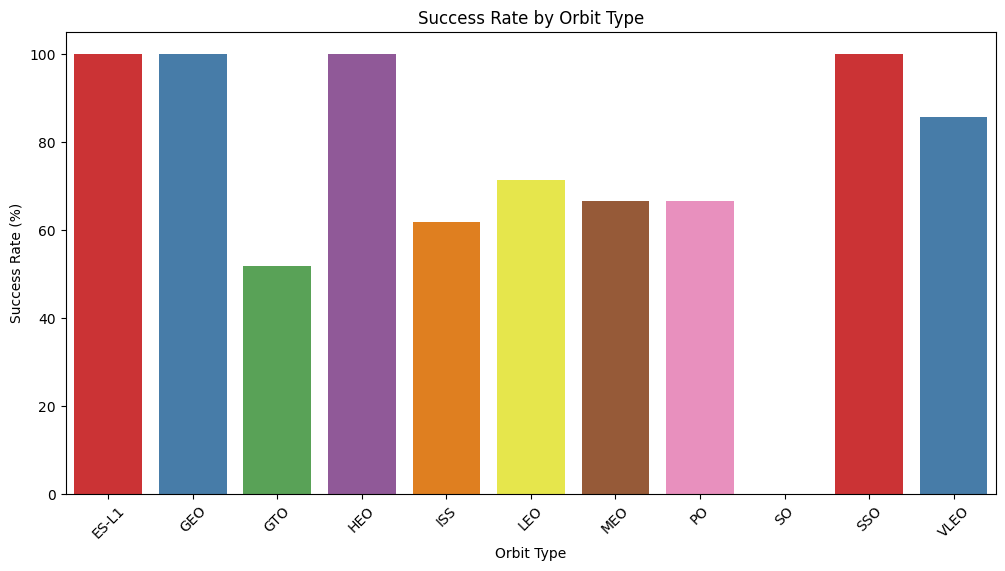

In [16]:
### TASK  3: Visualize the relationship between success rate of each orbit type
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named 'df' with your data
# Replace 'df' with the actual name of your DataFrame

# Calculate success rates for each orbit type
orbit_success_rates = df.groupby('Orbit')['Class'].mean() * 100

# Create a bar chart to visualize success rates
plt.figure(figsize=(12, 6))
sns.barplot(x=orbit_success_rates.index, y=orbit_success_rates.values, palette='Set1')
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate (%)')
plt.title('Success Rate by Orbit Type')
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [43]:
orbit_success_rates = df.groupby('Orbit')['Class'].mean() * 100
orbit_success_rates

Orbit
ES-L1    100.000000
GEO      100.000000
GTO       51.851852
HEO      100.000000
ISS       61.904762
LEO       71.428571
MEO       66.666667
PO        66.666667
SO         0.000000
SSO      100.000000
VLEO      85.714286
Name: Class, dtype: float64

Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


In [ ]:
# HINT use groupby method on Orbit column and get the mean of Class column

Analyze the ploted bar chart try to find which orbits have high sucess rate.


In [ ]:
### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


In [ ]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with your data
# Replace 'df' with the actual name of your DataFrame

# Create a scatter plot
plt.figure(figsize=(16, 6))
sns.catplot(x='FlightNumber', y='Orbit', hue='Class', data=df, palette='Set1',)

# Set labels and title
plt.xlabel('Flight Number')
plt.ylabel('Orbit')
plt.title('Flight Number vs. Orbit with Class')

# Display the plot
plt.legend(title='Class', loc='upper right')
plt.show()


You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


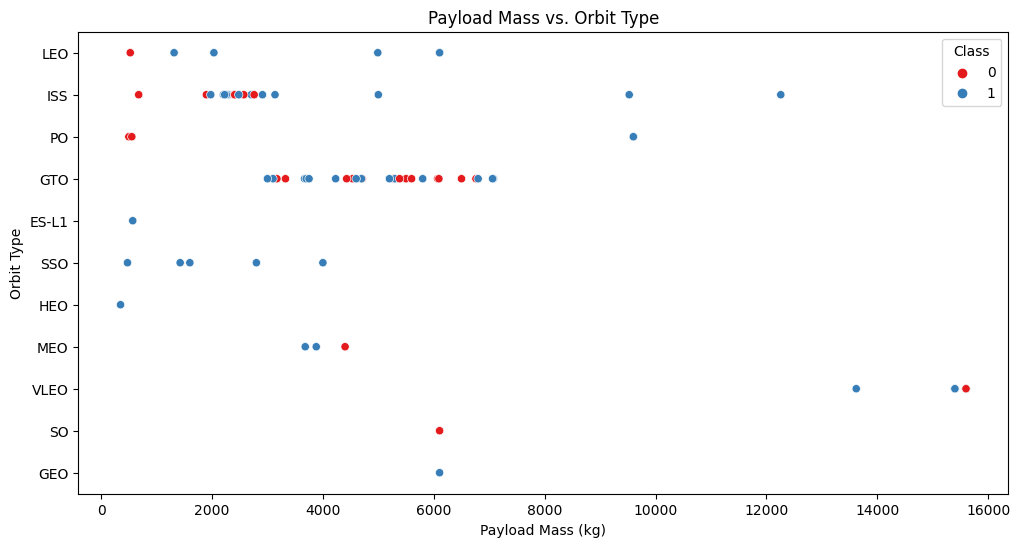

In [19]:
### TASK  5: Visualize the relationship between Payload and Orbit type
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with your data
# Replace 'df' with the actual name of your DataFrame

# Create a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='PayloadMass', y='Orbit', hue='Class', data=df, palette='Set1')

# Set labels and title
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Orbit Type')
plt.title('Payload Mass vs. Orbit Type')

# Display the plot
plt.show()


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


In [ ]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.


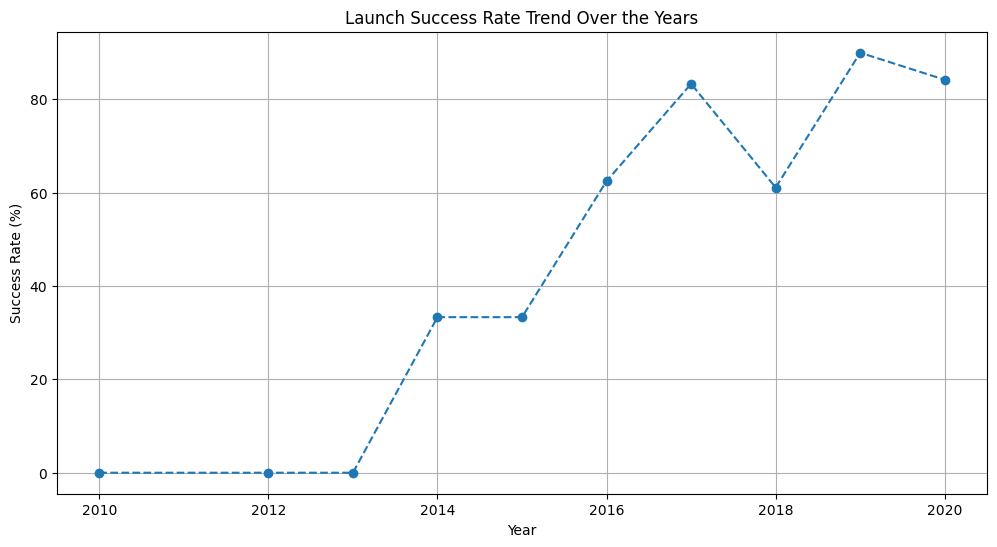

In [63]:
### TASK  6: Visualize the launch success yearly trend
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with your data
# Replace 'df' with the actual name of your DataFrame

# Convert the 'Date' column to a datetime object and extract the year
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Calculate the success rate for each year
yearly_success_rate = df.groupby('Year')['Class'].mean() * 100

# Create a line plot to visualize the yearly success rate trend
plt.figure(figsize=(12, 6))
plt.plot(yearly_success_rate.index, yearly_success_rate.values, marker='o', linestyle='--')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Success Rate (%)')
plt.title('Launch Success Rate Trend Over the Years')

# Display the plot
plt.grid(True)
plt.show()


In [59]:
df['Year'] = pd.to_datetime(df['Date']).dt.year


In [61]:
yearly_success_rate = df.groupby('Year')['Class'].mean() * 100
yearly_success_rate 

Year
2010     0.000000
2012     0.000000
2013     0.000000
2014    33.333333
2015    33.333333
2016    62.500000
2017    83.333333
2018    61.111111
2019    90.000000
2020    84.210526
Name: Class, dtype: float64

You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [ ]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()
    

In [ ]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate

you can observe that the sucess rate since 2013 kept increasing till 2020


In [ ]:
## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [21]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [ ]:
### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [22]:
# HINT: Use get_dummies() function on the categorical columns
import pandas as pd

# Assuming you have a DataFrame named 'features' with your data
# Replace 'features' with the actual name of your DataFrame

# List of columns to one-hot encode
columns_to_encode = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']

# Apply one-hot encoding to selected columns
features_one_hot = pd.get_dummies(features, columns=columns_to_encode)

# Display the resulting DataFrame
print(features_one_hot.head())


   FlightNumber  PayloadMass  Flights  GridFins  Reused   Legs  Block  \
0             1  6104.959412        1     False   False  False    1.0   
1             2   525.000000        1     False   False  False    1.0   
2             3   677.000000        1     False   False  False    1.0   
3             4   500.000000        1     False   False  False    1.0   
4             5  3170.000000        1     False   False  False    1.0   

   ReusedCount  Orbit_ES-L1  Orbit_GEO  ...  Serial_B1048  Serial_B1049  \
0            0            0          0  ...             0             0   
1            0            0          0  ...             0             0   
2            0            0          0  ...             0             0   
3            0            0          0  ...             0             0   
4            0            0          0  ...             0             0   

   Serial_B1050  Serial_B1051  Serial_B1054  Serial_B1056  Serial_B1058  \
0             0             0      

In [64]:
features_one_hot.columns

Index(['FlightNumber', 'PayloadMass', 'Flights', 'GridFins', 'Reused', 'Legs',
       'Block', 'ReusedCount', 'Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO',
       'Orbit_HEO', 'Orbit_ISS', 'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO',
       'Orbit_SO', 'Orbit_SSO', 'Orbit_VLEO', 'LaunchSite_CCAFS SLC 40',
       'LaunchSite_KSC LC 39A', 'LaunchSite_VAFB SLC 4E',
       'LandingPad_5e9e3032383ecb267a34e7c7',
       'LandingPad_5e9e3032383ecb554034e7c9',
       'LandingPad_5e9e3032383ecb6bb234e7ca',
       'LandingPad_5e9e3032383ecb761634e7cb',
       'LandingPad_5e9e3033383ecbb9e534e7cc', 'Serial_B0003', 'Serial_B0005',
       'Serial_B0007', 'Serial_B1003', 'Serial_B1004', 'Serial_B1005',
       'Serial_B1006', 'Serial_B1007', 'Serial_B1008', 'Serial_B1010',
       'Serial_B1011', 'Serial_B1012', 'Serial_B1013', 'Serial_B1015',
       'Serial_B1016', 'Serial_B1017', 'Serial_B1018', 'Serial_B1019',
       'Serial_B1020', 'Serial_B1021', 'Serial_B1022', 'Serial_B1023',
       'Serial_B1025', 'Serial

In [67]:
### TASK  8: Cast all numeric columns to `float64`
# Assuming you have a DataFrame named 'features_one_hot' with your data
# Replace 'features_one_hot' with the actual name of your DataFrame
# Assuming you have a DataFrame named 'features_one_hot' with your data
# Replace 'features_one_hot' with the actual name of your DataFrame

# Select only numeric columns
numeric_columns = features_one_hot.select_dtypes(include=['number']).columns

# Cast numeric columns to float64
features_one_hot=features_one_hot[numeric_columns] = features_one_hot[numeric_columns].astype('float64')

features_one_hot

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [66]:
numeric_columns = features_one_hot.select_dtypes(include=['number']).columns
numeric_columns

Index(['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount',
       'Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO', 'Orbit_HEO', 'Orbit_ISS',
       'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO', 'Orbit_SO', 'Orbit_SSO',
       'Orbit_VLEO', 'LaunchSite_CCAFS SLC 40', 'LaunchSite_KSC LC 39A',
       'LaunchSite_VAFB SLC 4E', 'LandingPad_5e9e3032383ecb267a34e7c7',
       'LandingPad_5e9e3032383ecb554034e7c9',
       'LandingPad_5e9e3032383ecb6bb234e7ca',
       'LandingPad_5e9e3032383ecb761634e7cb',
       'LandingPad_5e9e3033383ecbb9e534e7cc', 'Serial_B0003', 'Serial_B0005',
       'Serial_B0007', 'Serial_B1003', 'Serial_B1004', 'Serial_B1005',
       'Serial_B1006', 'Serial_B1007', 'Serial_B1008', 'Serial_B1010',
       'Serial_B1011', 'Serial_B1012', 'Serial_B1013', 'Serial_B1015',
       'Serial_B1016', 'Serial_B1017', 'Serial_B1018', 'Serial_B1019',
       'Serial_B1020', 'Serial_B1021', 'Serial_B1022', 'Serial_B1023',
       'Serial_B1025', 'Serial_B1026', 'Serial_B1028', 'Serial_B102

Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [ ]:
# HINT: use astype function


We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>


In [ ]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2022-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
